## Ejercicios

- Importa el archivo datos_1.csv, y datos_2.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos1 = pd.read_csv('datos_1.csv', parse_dates=True, index_col=1)

In [3]:
del datos1['Unnamed: 0']

In [4]:
datos1 = pd.read_csv('datos_1.csv', parse_dates=['date'], usecols=['date', 'close', 'ticker'])
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7706 entries, 0 to 7705
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7706 non-null   datetime64[ns]
 1   close   7704 non-null   float64       
 2   ticker  7705 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 180.7+ KB


In [5]:
datos2 = pd.read_csv('datos_2.csv', parse_dates=['date'], usecols=['date', 'close', 'ticker'])
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4167 non-null   datetime64[ns]
 1   close   4166 non-null   float64       
 2   ticker  4166 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 97.8+ KB


In [6]:
datos1.head()

,date,close,ticker
0,2003-01-02,7.656343,NTGY
1,2003-01-03,7.559982,NTGY
2,2003-01-07,7.682624,NTGY
3,2003-01-08,7.884107,NTGY
4,2003-01-09,7.945427,NTGY


- Crea un dataframe en el que se incluyan los datos de ambos archivos

In [7]:
datos = pd.concat([datos1, datos2], axis=0)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11873 entries, 0 to 4166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11873 non-null  datetime64[ns]
 1   close   11870 non-null  float64       
 2   ticker  11871 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 371.0+ KB


In [8]:
datos

,date,close,ticker
0,2003-01-02,7.656343,NTGY
1,2003-01-03,7.559982,NTGY
2,2003-01-07,7.682624,NTGY
3,2003-01-08,7.884107,NTGY
4,2003-01-09,7.945427,NTGY
...,...,...,...
4162,2019-05-09,4.147500,SAN
4163,2019-05-10,4.121500,SAN
4164,2019-05-13,4.064500,SAN
4165,2019-05-14,4.104000,SAN


In [9]:
datos[datos['ticker'].isna()]

,date,close,ticker
4185,2005-07-28,3.135777,NaN
17,2003-01-28,1.952477,NaN


In [10]:
a = datos.reset_index()

In [11]:
a[a['ticker'].isna()]

,index,date,close,ticker
4185,4185,2005-07-28,3.135777,NaN
7723,17,2003-01-28,1.952477,NaN


Puedo quedarme con aquellas filas en las que ticker is not na

In [12]:
datos = datos[datos['ticker'].notna()]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11871 entries, 0 to 4166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11871 non-null  datetime64[ns]
 1   close   11868 non-null  float64       
 2   ticker  11871 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 371.0+ KB


Puedo rellenar los valores de ticker con el valor de ticker anterior

In [13]:
datos = pd.concat([datos1, datos2])
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11873 entries, 0 to 4166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11873 non-null  datetime64[ns]
 1   close   11870 non-null  float64       
 2   ticker  11871 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 371.0+ KB


In [14]:
datos['ticker'].fillna(method='ffill', inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11873 entries, 0 to 4166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11873 non-null  datetime64[ns]
 1   close   11870 non-null  float64       
 2   ticker  11873 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 371.0+ KB


In [15]:
datos

,date,close,ticker
0,2003-01-02,7.656343,NTGY
1,2003-01-03,7.559982,NTGY
2,2003-01-07,7.682624,NTGY
3,2003-01-08,7.884107,NTGY
4,2003-01-09,7.945427,NTGY
...,...,...,...
4162,2019-05-09,4.147500,SAN
4163,2019-05-10,4.121500,SAN
4164,2019-05-13,4.064500,SAN
4165,2019-05-14,4.104000,SAN


- Con el dataframe anterior crea un nuevo df llamado **stocks_df**, en el que tengamos el ticker como nombre de columna, las fechas como índice y los valores sean el cierre

In [16]:
stocks_df = datos.pivot(columns='ticker', values='close', index='date')
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4167 entries, 2003-01-02 to 2019-05-15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NTGY    4167 non-null   float64
 1   REE     3537 non-null   float64
 2   SAN     4166 non-null   float64
dtypes: float64(3)
memory usage: 130.2 KB


In [17]:
stocks_df

ticker,NTGY,REE,SAN
date,,,
2003-01-02,7.656343,NaN,2.309851
2003-01-03,7.559982,NaN,2.222686
2003-01-07,7.682624,NaN,2.309851
2003-01-08,7.884107,NaN,2.309851
2003-01-09,7.945427,NaN,2.309851
...,...,...,...
2019-05-09,25.590000,18.650,4.147500
2019-05-10,25.950000,18.900,4.121500
2019-05-13,26.200000,19.325,4.064500


- Limpia los datos de la manera que creas conveniente, haz una descripción de los datos antes y después de la limpieza. Explica sus diferencias

Primero veo los NaN existentes

In [18]:
stocks_df.isna()

ticker,NTGY,REE,SAN
date,,,
2003-01-02,False,True,False
2003-01-03,False,True,False
2003-01-07,False,True,False
2003-01-08,False,True,False
2003-01-09,False,True,False
...,...,...,...
2019-05-09,False,False,False
2019-05-10,False,False,False
2019-05-13,False,False,False


In [19]:
stocks_df.isna().any(axis=1)

date
2003-01-02     True
2003-01-03     True
2003-01-07     True
2003-01-08     True
2003-01-09     True
              ...  
2019-05-09    False
2019-05-10    False
2019-05-13    False
2019-05-14    False
2019-05-15    False
Length: 4167, dtype: bool

In [20]:
stocks_df[stocks_df.isna().any(axis=1)]

ticker,NTGY,REE,SAN
date,,,
2003-01-02,7.656343,NaN,2.309851
2003-01-03,7.559982,NaN,2.222686
2003-01-07,7.682624,NaN,2.309851
2003-01-08,7.884107,NaN,2.309851
2003-01-09,7.945427,NaN,2.309851
...,...,...,...
2005-06-29,10.380740,NaN,3.521433
2005-06-30,10.415781,NaN,3.512716
2005-07-13,10.626024,NaN,3.626030


Veo cuál es el primer valor no NaN de cada columna

In [21]:
stocks_df.apply(pd.Series.first_valid_index)

ticker
NTGY   2003-01-02
REE    2005-07-01
SAN    2003-01-02
dtype: datetime64[ns]

Elimino las filas hasta el primer valor de REE

In [22]:
stocks_df = stocks_df.loc['2005-07-01':]

Busco si hay nuevos NaN

In [23]:
stocks_df.isna().sum()

ticker
NTGY    0
REE     3
SAN     0
dtype: int64

In [24]:
stocks_df[stocks_df.isna().any(axis=1)]

ticker,NTGY,REE,SAN
date,,,
2005-07-13,10.626024,NaN,3.626030
2005-08-03,10.643544,NaN,3.748059
2005-09-13,10.293139,NaN,3.791641


Como son pocos valores y no consecutivos, los relleno usando el método ffill

In [25]:
stocks_df.fillna(method='ffill', inplace=True)

c:\Users\34686\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [26]:
stocks_df.isna().sum()

ticker
NTGY    0
REE     0
SAN     0
dtype: int64

In [27]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3540 entries, 2005-07-01 to 2019-05-15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NTGY    3540 non-null   float64
 1   REE     3540 non-null   float64
 2   SAN     3540 non-null   float64
dtypes: float64(3)
memory usage: 110.6 KB


- Calcula los retornos diarios (porcetuales y logarítmicos) de los datos.

In [28]:
stocks_df_ret = stocks_df.pct_change().dropna()
stocks_df_ret.head()

ticker,NTGY,REE,SAN
date,,,
2005-07-04,-0.006633,-0.012725,-0.002439
2005-07-05,0.000835,-0.005333,0.002445
2005-07-06,-0.002502,-0.008490,0.000000
2005-07-07,-0.022575,-0.008562,-0.021951
2005-07-08,0.019675,0.016364,0.019950


In [29]:
stocks_df_log_ret = np.log(stocks_df).diff().dropna()
stocks_df_log_ret.head()

ticker,NTGY,REE,SAN
date,,,
2005-07-04,-0.006656,-0.012807,-0.002442
2005-07-05,0.000834,-0.005348,0.002442
2005-07-06,-0.002505,-0.008526,0.000000
2005-07-07,-0.022834,-0.008599,-0.022196
2005-07-08,0.019484,0.016231,0.019754


- Calcula los retornos semanales, mensuales, y anuales

In [30]:
stocks_df_week = stocks_df.resample('W').last().pct_change().dropna()
stocks_df_week.head()

ticker,NTGY,REE,SAN
date,,,
2005-07-10,-0.011609,-0.018868,-0.002439
2005-07-17,0.004195,-0.013864,0.017115
2005-07-24,0.029240,0.016327,0.007212
2005-07-31,-0.007305,-0.009371,0.021480
2005-08-07,-0.011447,0.002252,-0.009346


In [31]:
stocks_df_month = stocks_df.resample('M').last().pct_change().dropna()
stocks_df_month.head()

ticker,NTGY,REE,SAN
date,,,
2005-08-31,-0.020442,-0.014865,-0.028037
2005-09-30,0.006678,0.085963,0.103365
2005-10-31,-0.060531,-0.063158,-0.010893
2005-11-30,0.016770,0.057079,0.006608
2005-12-31,0.024306,0.112245,0.043764


In [32]:
stocks_df_year = stocks_df.resample('Y').last().pct_change().dropna()
stocks_df_year.head()

ticker,NTGY,REE,SAN
date,,,
2006-12-31,0.311864,0.276704,0.320755
2007-12-31,0.367571,0.366853,0.080952
2008-12-31,-0.502598,-0.145450,-0.477239
2009-12-31,-0.054330,0.120861,0.839663
2010-12-31,-0.190723,-0.049951,-0.260459


- Crea una nueva columna en el dataframe usando la función apply, que  calcule el ratio de sharpe. (usa una ventana de 15 días) 

In [33]:
def sharpe(returns,numero_dias):
    mean = returns.mean()*np.sqrt(numero_dias)
    std = returns.std()

    sharpe = mean/std

    return sharpe

In [34]:
window = 15
sharpe_df = stocks_df_log_ret.rolling(window).apply(lambda x: np.sqrt(window) * x.mean()/x.std()).dropna()
sharpe_df.head()

ticker,NTGY,REE,SAN
date,,,
2005-07-22,0.469592,-0.518226,0.578565
2005-07-25,0.608200,-0.322793,0.772752
2005-07-26,0.662009,0.220533,0.831826
2005-07-27,0.584954,0.492597,0.764381
2005-07-28,1.123660,0.514449,2.214013


In [35]:
stocks_df_log_ret_sharpe = pd.concat([stocks_df_log_ret, sharpe_df], axis=1, join='inner')

In [36]:
stocks_df_log_ret_sharpe

ticker,NTGY,REE,SAN,NTGY,REE,SAN
date,,,,,,
2005-07-22,0.004067,0.005818,-0.002384,0.469592,-0.518226,0.578565
2005-07-25,-0.000812,-0.005818,0.004762,0.608200,-0.322793,0.772752
2005-07-26,0.003244,0.011602,0.004739,0.662009,0.220533,0.831826
2005-07-27,-0.005684,-0.000444,-0.002367,0.584954,0.492597,0.764381
2005-07-28,-0.006536,-0.008021,0.014118,1.123660,0.514449,2.214013
...,...,...,...,...,...,...
2019-05-09,-0.013970,0.011866,-0.024413,0.456998,0.213533,-1.642178
2019-05-10,0.013970,0.013316,-0.006289,1.429572,1.337433,-1.850145
2019-05-13,0.009588,0.022238,-0.013926,1.635357,1.626060,-2.492280


- Crea un modulo con una función que dado los valores de cierre de un activo calcule las bandas de Bollinger. Recuerda que las bandas Bollinger se calculan como MA − Kσ y MA + Kσ, donde MA es la media móvil de 30 muestras sobre el precio, σ es la desviación típica móvil de 30 muestras sobre el precio y K = 2. Importa el modulo y demuestra que funciona

In [37]:
from modulo_alfonso import añade_bollinger, añade_cruces

- Grafica las bandas de bollinger y los datos de cierre. Guarda la imagen en un archivo llamado **bollinger.png**

In [38]:
data_bollinger = stocks_df.loc[:, ['SAN']]
data_bollinger.columns = ['close']
data_bollinger.head()

,close
date,
2005-07-01,3.573731
2005-07-04,3.565015
2005-07-05,3.573731
2005-07-06,3.573731
2005-07-07,3.495283


In [39]:
stocks_bollinger = añade_bollinger(data_bollinger, 30, 30)
stocks_bollinger.head()

,close,upper_band,lower_band
date,,,
2005-08-11,3.739343,3.791452,3.522203
2005-08-12,3.739343,3.796454,3.528242
2005-08-15,3.730627,3.798997,3.536740
2005-08-16,3.721910,3.800378,3.545237
2005-08-17,3.678328,3.798254,3.554335


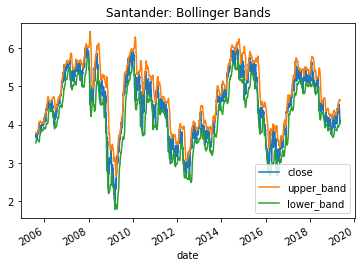

In [40]:
stocks_bollinger.plot()
plt.title('Santander: Bollinger Bands')
plt.savefig('bollinger.png')

- Genera un columna donde nos marque 1 cuando la cotizacion cruce la banda de bolliger inferior hacia arriba, -1 cuando cruce la banda superior hacia abajo, y 0 en el resto.

In [55]:
g_upper = stocks_bollinger.loc[:, "close"]> stocks_bollinger.loc[:, "upper_band"]
g_result = ((g_upper-g_upper.shift(1))==-1)*-1

In [56]:
m_lower = stocks_bollinger.loc[:, "close"] < stocks_bollinger.loc[:, "lower_band"]
m_result = ((m_lower-m_lower.shift(1))==-1)*1

In [57]:
stocks_bollinger = pd.concat([stocks_bollinger,g_result,m_result],axis=1)


In [58]:
stocks_bollinger

,close,upper_band,lower_band,upper_cross,lower_cross,0,1
date,,,,,,,
2005-08-11,3.739343,3.791452,3.522203,False,False,0,0
2005-08-12,3.739343,3.796454,3.528242,False,False,0,0
2005-08-15,3.730627,3.798997,3.536740,False,False,0,0
2005-08-16,3.721910,3.800378,3.545237,False,False,0,0
2005-08-17,3.678328,3.798254,3.554335,False,False,0,0
...,...,...,...,...,...,...,...
2019-05-09,4.147500,4.646283,4.034108,False,False,0,0
2019-05-10,4.121500,4.638026,4.048546,False,False,0,0
2019-05-13,4.064500,4.640483,4.044264,False,False,0,0
